#📌 Extracción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

datos = pd.read_json('/content/TelecomX_Data.json')

In [ ]:
datos.shape

(7267, 6)

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
import numpy as np

def tiene_dict(s):
    return s.apply(lambda x: isinstance(x, dict)).any()

def tiene_list(s):
    return s.apply(lambda x: isinstance(x, list)).any()

cols_dict = [c for c in datos.columns if tiene_dict(datos[c])]
cols_list = [c for c in datos.columns if tiene_list(datos[c])]
cols_dict, cols_list


(['customer', 'phone', 'internet', 'account'], [])

In [ ]:
for c in cols_dict:
    # normaliza la columna dict a columnas nuevas con prefijo "c."
    expand = pd.json_normalize(datos[c]).add_prefix(f"{c}.")
    datos = datos.drop(columns=c).join(expand)


In [ ]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
type(datos)

pandas.core.frame.DataFrame

#🔧 Transformación

In [ ]:
#Comprobando tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#Verificando si existen NULLS
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Sumar columnas numericas
suma_cols = datos.sum(numeric_only=True)
suma_cols
#Se observa que la variable Charge.Total no suma

,0
customer.SeniorCitizen,1182.00
customer.tenure,235062.00
account.Charges.Monthly,470320.95


In [ ]:
datos['account.Charges.Total'].sum()

'593.3542.4280.851237.85267.4571.457904.255377.8340.355957.92460.558456.75351.57261.252560.16849.41993.272.12791.525.11306.31215.61849.9557.276.3530.55656.751090.6471.851396.9929.33247.55900.97942.151343.4825.41070.154959.65597.65224.5192991.12078.95630.616111242.456316.2727.85353244.32607.65567.553767.43673.64036.851120.3314.551888.45529.87308.956252.72878.551212.18182.8519.8599.752861.451442.24059.354145.93645.5187.752317.11448.82193.651355.11748.9511.255526.751553.9511476747.35865.055976.9181.653268.051052.47634.2580.263.75190.52401.05511.253949.152362.170.91696.21152.7287.858496.7470.21564.41847.553694.7584017.456825.658309.55605.451972.3533.7844.452111.36205.5855.3633.85474.95848.66471.858127.6676.35864.26049.51582.75198.11098.854039.32438.67113.75576.65371.9167.3219.5273.42555.05223.15165.589.3235.051144.64908.252298.93789.275.947652196.385.551444.655405.86339.33847.6673319.750.16140.853870.37624.24354.453431.752227.12045.551929.35268.45181.5651.43486.651389.62303.351522.76717.98

In [ ]:
from os import replace

import pandas as pd

# si los valores traen espacios/comas como separadores
datos['account.Charges.Total'] = (
    datos['account.Charges.Total']
      .astype(str)
      .str.replace(' ', '', regex=False)     # quita espacios
      .str.replace(',', '', regex=False)     # quita comas (miles)
      # .str.replace(',', '.', regex=False)  # ← usa esta línea en vez de la anterior si la coma es decimal
      .str.strip()
)

datos['account.Charges.Total'] = pd.to_numeric(
    datos['account.Charges.Total'], errors='coerce'
)


In [ ]:
datos.sum(numeric_only=True)

,0
customer.SeniorCitizen,1182.00
customer.tenure,235062.00
account.Charges.Monthly,470320.95
account.Charges.Total,16548281.85


In [ ]:
n=datos['account.Charges.Total'].isnull().sum()
n

np.int64(11)

In [ ]:
#Revisando vacios
vacios=datos.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(vacios[vacios > 0])


Churn    224
dtype: int64


In [ ]:
#Reemplazando vacios por null
import numpy as np

# Reemplazar cadenas vacías o espacios por NaN en toda la tabla
datos= datos.replace(r'^\s*$', np.nan, regex=True)


##Coherencia de los Datos
* Ver si cuenta con NAs
* Si los valores númericos son todos positivos
* Si el ID contiene valor único para cada registro

In [ ]:
#Contando los null por variables
z=datos.isnull().sum()
print(z[z > 0])
#Solo dos variables cuentan con vacios "Churn" y "Charges.Total"

Churn                    224
account.Charges.Total     11
dtype: int64


In [ ]:
#Verificar si existen valores únicos en ID, para ello buscaremos duplicados

duplicados =(
    datos
    .groupby("customerID")
    .size()
    .reset_index(name="conteo")
)

dupicados =duplicados[duplicados["conteo"]> 1]
#Como no retorna ningun valro mayor a 1, significa que todos los ID son unicos


##¿Cuáles son los valores únicos de cada variable, es decir que valores puede tomar la variable?

In [ ]:
 for col in datos.columns:
    if col != "customerID":
        print(f"\nColumna: {col}")
        print(datos[col].unique())



Columna: Churn
['No' 'Yes' nan]

Columna: customer.gender
['Female' 'Male']

Columna: customer.SeniorCitizen
[0 1]

Columna: customer.Partner
['Yes' 'No']

Columna: customer.Dependents
['Yes' 'No']

Columna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: phone.PhoneService
['Yes' 'No']

Columna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Columna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Columna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Columna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Columna: internet.TechSupport
['Yes' 'No' 'No internet service']

Columna: internet.StreamingTV
['Yes' 'No' 'No internet service']

Columna: internet.StreamingMovies
['No' 'Yes'

## Columna de cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
datos["Cuentas_Diarias"]=datos["account.Charges.Monthly"]/30
datos["Cuentas_Diarias"].head()

,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


##Estandarización y transformación de datos (opcional)
Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
#Renombrando variables
datos.columns=["id","churn","genero","mayor_65","con_pareja","dependientes","meses_contrato","sus_tel",
               "multi_lines","internet","seguridad_online","respaldo","prote_disp","soporte_tec","tv",
               "pelis","tipo_contrato","factura_online","metodo_pago","total_mes","total","total_diario"]


In [ ]:
datos.columns

Index(['id', 'churn', 'genero', 'mayor_65', 'con_pareja', 'dependientes',
       'meses_contrato', 'sus_tel', 'multi_lines', 'internet',
       'seguridad_online', 'respaldo', 'prote_disp', 'soporte_tec', 'tv',
       'pelis', 'tipo_contrato', 'factura_online', 'metodo_pago', 'total_mes',
       'total', 'total_diario'],
      dtype='object')

## Cambiando valores por ceros y unos

In [ ]:
# Se toma como 1 "Yes", todo caso contrario sería 0
vars_yes_no=["con_pareja","dependientes","sus_tel",
               "multi_lines","seguridad_online","respaldo","prote_disp","soporte_tec","tv",
               "pelis","factura_online"]

for c in vars_yes_no:
    datos[c] = (datos[c] == "Yes").astype(int)

In [ ]:
for col in datos.columns:
    if col != "id":
        print(f"\nColumna: {col}")
        print(datos[col].unique())



Columna: churn
['No' 'Yes' nan]

Columna: genero
['Female' 'Male']

Columna: mayor_65
[0 1]

Columna: con_pareja
[1 0]

Columna: dependientes
[1 0]

Columna: meses_contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: sus_tel
[1 0]

Columna: multi_lines
[0 1]

Columna: internet
['DSL' 'Fiber optic' 'No']

Columna: seguridad_online
[0 1]

Columna: respaldo
[1 0]

Columna: prote_disp
[0 1]

Columna: soporte_tec
[1 0]

Columna: tv
[1 0]

Columna: pelis
[0 1]

Columna: tipo_contrato
['One year' 'Month-to-month' 'Two year']

Columna: factura_online
[1 0]

Columna: metodo_pago
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Columna: total_mes
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

Columna: total
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]

Columna:

#📊 Carga y análisis

## Análisis Descriptivo
Cálculo de media, medianda, desviación estándar

In [ ]:
datos.describe()

,mayor_65,con_pareja,dependientes,meses_contrato,sus_tel,multi_lines,seguridad_online,respaldo,prote_disp,soporte_tec,tv,pelis,factura_online,total_mes,total,total_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
datos.median(numeric_only=True)

,0
mayor_65,0.000000
con_pareja,0.000000
dependientes,0.000000
meses_contrato,29.000000
sus_tel,1.000000
multi_lines,0.000000
seguridad_online,0.000000
respaldo,0.000000
prote_disp,0.000000
soporte_tec,0.000000


## Distribución de Churn (Evasión)

Se puede observar que el 26.54% de los clientes dejaron la empresa, mientras que el 73.46% permanece.


In [ ]:
dist_churn = round(datos['churn'].value_counts(normalize=True)*100,2)
dist_churn

,proportion
churn,
No,73.46
Yes,26.54


### Gráfica de Churn

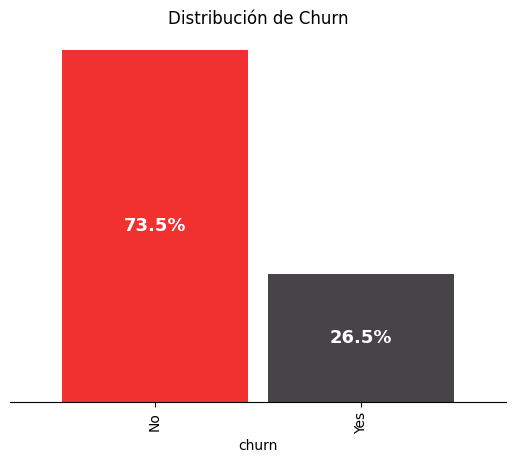

In [ ]:
import matplotlib.pyplot as plt

colores = ['#f13030', '#474448']

# Porcentajes
dist_churn = round(datos['churn'].value_counts(normalize=True) * 100, 2)

# Gráfica de barras
ax = dist_churn.plot(kind='bar', color=colores, width=0.9)

# Etiquetas dentro de cada barra
for i, val in enumerate(dist_churn):
    ax.text(i, val/2, f"{val:.1f}%",
            ha='center', va='center', color='white', fontsize=13, fontweight='bold')

# Título
plt.title("Distribución de Churn")

# Mostrar solo eje X (categorías abajo y su etiqueta)
ax.yaxis.set_visible(False)     # ocultar eje Y
ax.spines['left'].set_visible(False)   # quitar línea izquierda
ax.spines['right'].set_visible(False)  # quitar línea derecha
ax.spines['top'].set_visible(False)    # quitar línea superior



## Recuento de evasión por variables categóricas

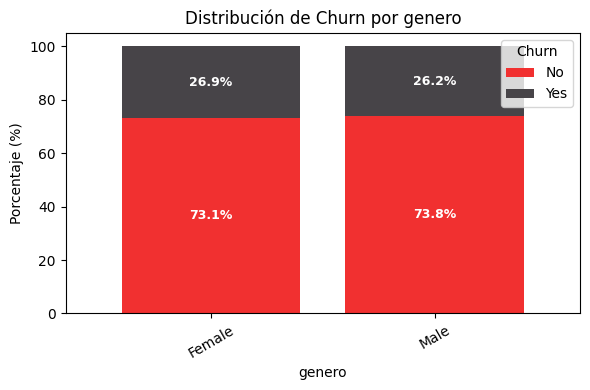

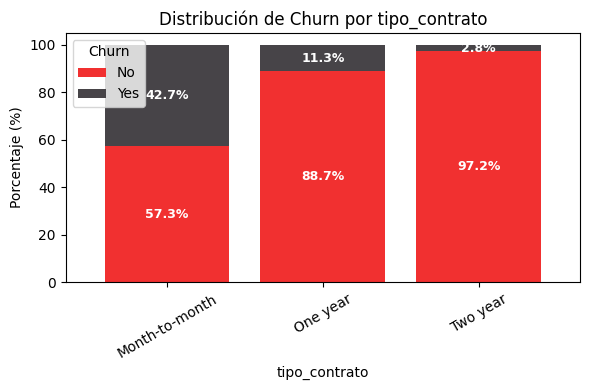

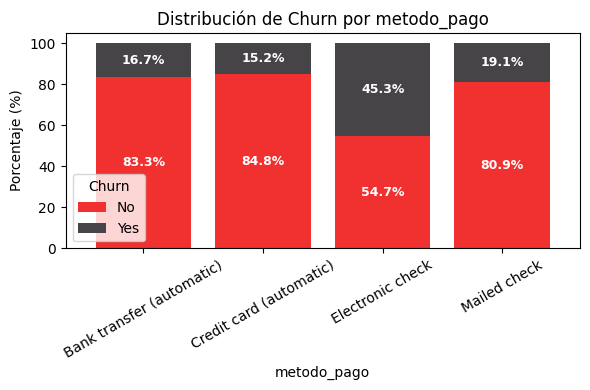

In [ ]:
import matplotlib.pyplot as plt

cat_vars = ["genero", "tipo_contrato", "metodo_pago"]

for var in cat_vars:
    # Distribución porcentual de churn por categoría
    dist = datos.groupby(var)["churn"].value_counts(normalize=True).unstack().fillna(0) * 100

    # Gráfica de barras apiladas
    ax = dist.plot(kind="bar", stacked=True, figsize=(6,4),
                   color=['#f13030', '#474448'], width=0.8)

    # Etiquetas dentro de las barras
    for i, categoria in enumerate(dist.index):
        acumulado = 0
        for j, valor in enumerate(dist.loc[categoria]):
            if valor > 0:  # evita mostrar 0%
                ax.text(i, acumulado + valor/2, f"{valor:.1f}%",
                        ha='center', va='center', color='white',
                        fontsize=9, fontweight='bold')
            acumulado += valor

    # Títulos y etiquetas
    plt.title(f"Distribución de Churn por {var}")
    plt.ylabel("Porcentaje (%)")
    plt.xlabel(var)
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


## Conteo de evasión por variables numéricas

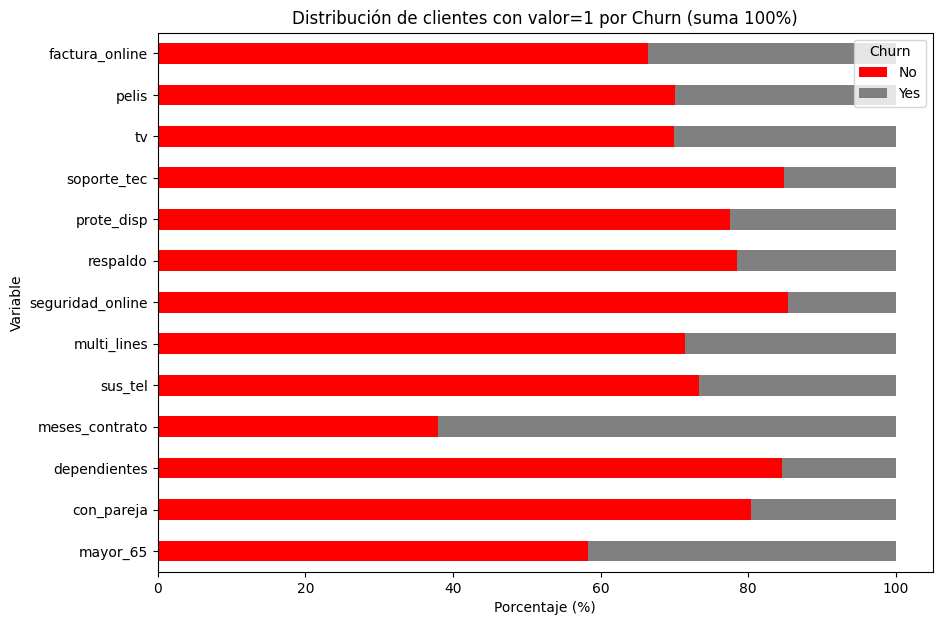

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Variables binarias a graficar
vars_binarias = ["mayor_65","con_pareja","dependientes","meses_contrato",
    "sus_tel","multi_lines","seguridad_online","respaldo","prote_disp",
    "soporte_tec","tv","pelis","factura_online"]

# Calcular proporciones de churn SOLO para clientes con valor = 1 en cada variable
porcentajes = {}
for var in vars_binarias:
    subset = datos[datos[var] == 1]                # solo clientes con valor = 1
    dist = subset["churn"].value_counts(normalize=True) * 100
    porcentajes[var] = dist

# Convertir a DataFrame
porc = pd.DataFrame(porcentajes).T.fillna(0)  # filas = variables, columnas = Churn=Yes/No
ax = porc.plot(kind="barh", stacked=True,
               color=["red","gray"], figsize=(10,7))



plt.title("Distribución de clientes con valor=1 por Churn (suma 100%)")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Variable")
plt.legend(title="Churn")
plt.show()

In [ ]:
porcentajes

{'mayor_65': churn
 No     58.318739
 Yes    41.681261
 Name: proportion, dtype: float64,
 'con_pareja': churn
 No     80.335097
 Yes    19.664903
 Name: proportion, dtype: float64,
 'dependientes': churn
 No     84.549763
 Yes    15.450237
 Name: proportion, dtype: float64,
 'meses_contrato': churn
 Yes    61.990212
 No     38.009788
 Name: proportion, dtype: float64,
 'sus_tel': churn
 No     73.290363
 Yes    26.709637
 Name: proportion, dtype: float64,
 'multi_lines': churn
 No     71.390104
 Yes    28.609896
 Name: proportion, dtype: float64,
 'seguridad_online': churn
 No     85.388806
 Yes    14.611194
 Name: proportion, dtype: float64,
 'respaldo': churn
 No     78.468506
 Yes    21.531494
 Name: proportion, dtype: float64,
 'prote_disp': churn
 No     77.497936
 Yes    22.502064
 Name: proportion, dtype: float64,
 'soporte_tec': churn
 No     84.833659
 Yes    15.166341
 Name: proportion, dtype: float64,
 'tv': churn
 No     69.929812
 Yes    30.070188
 Name: proportion, dtype

Acorde al gráfico, las variables que presentan más bajas son mes_contrato, mayor_65 y factura online

#📄Informe final

## Introducción

El análisis tiene como objetivo estudiar la evasión de clientes (Churn) en una compañía de servicios TelecomX, con el fin de identificar los factores asociados a la cancelación del servicio. Se investigaron principalmente variables binarias relacionadas con el perfil y los servicios contratados: edad (mayores de 65 años), situación familiar (con pareja y dependientes), así como el uso de servicios adicionales (líneas múltiples, suscripción telefónica, respaldo de datos, protección de dispositivos, soporte técnico, TV, películas, seguridad online y factura electrónica).
El propósito es comprender cómo estas características se relacionan con el Churn, para diseñar estrategias que fortalezcan la retención de clientes.

##Limpieza y Tratamiento de Datos

Se realizaron las siguientes transformaciones sobre la base de datos datos:

Eliminación de registros con valores nulos o inconsistentes, para asegurar calidad en el análisis.

Conversión de variables categóricas (“Sí/No”) a valores binarios (1 y 0).

Renombración de columnas con el fin de estandarizar y facilitar la interpretación de resultados.

Cálculo de proporciones por variable, garantizando que los porcentajes de Churn = Sí y Churn = No sumen 100% en cada caso.

## Análisis Exploratorio de Datos

Las variables que más proporción de bajas tienen son:

meses_contrato → 61.99%

factura_online → 33.57%

tv → 30.07%

pelis → 29.94%

multi_lines → 28.61%

tipo_contrato: Month to Month → 42.7%

metodo de pago: Electronic check  → 45.3%

No se observa una diferencia de baja de los clientes por genero, no es una variable que afecte en la permanencia, por otro lado se observa que hay una mayor baja para metodo de pago "Electronic Check" y contrato Month to month

## Recomendaciones

1. Ofrecer contrato de mayor duración, beneficios por contratar planes más extensos.
2. Disminuir el pago Electronic check, regalar puntos por usas otros métodos de pago.
